<a href="https://colab.research.google.com/github/adityakalra581/Data-Science/blob/master/Deep%20Learning/Hand-Written-Digit-Recognizer/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [54]:
tf.__version__

'1.15.0'

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [57]:
type(test_y)

numpy.ndarray

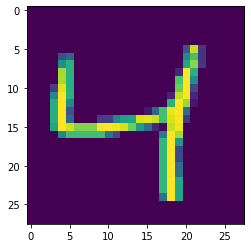

In [58]:
plt.imshow(train_x[2])
plt.show()

In [59]:
print("Shape of train_x: ",train_x.shape)
print("Shape of train_y: ",train_y.shape)
print("Shape of test_x: ",test_x.shape)
print("Shape of test_y: ",test_y.shape)

Shape of train_x:  (60000, 28, 28)
Shape of train_y:  (60000,)
Shape of test_x:  (10000, 28, 28)
Shape of test_y:  (10000,)


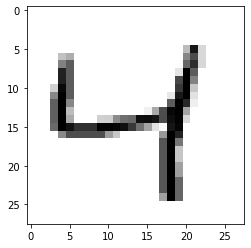

In [60]:
## Conversion into grayscale:

plt.imshow(train_x[2],cmap= plt.cm.binary)
plt.show()

In [61]:

## Clearly the data in csv is in pixels.

train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [62]:
## Let's see the structure of the data:
train_x[0:2]


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [0]:
## Normalize the Datset:
## x_train = tf.keras.utils.normalize(x_train, axis=1)
train_x = tf.keras.utils.normalize(train_x,axis=1)
test_x = tf.keras.utils.normalize(test_x, axis=1)

In [0]:
#train_x[0]

In [0]:
# Let's build a model:
## Reference: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = tf.keras.models.Sequential()

Now, we'll pop in layers. Recall our neural network image? Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

In [0]:
## Let's flatten the it
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))



ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as y = max(0, x). ... ReLU is the most commonly used activation function in neural networks, especially in CNNs. If you are unsure what activation function to use in your network, ReLU is usually a good first choice.

Softmax is an activation function. ... Softmax is exponential and enlarges differences - push one result closer to 1 while another closer to 0. It turns scores aka logits into probabilities. Cross entropy (cost function) is often computed for output of softmax and true labels (encoded in one hot encoding).

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
model.fit(train_x,train_y, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2586 - acc: 0.9242
Epoch 2/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1055 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0714 - acc: 0.9771


In [70]:
val_loss, val_acc = model.evaluate(test_x, test_y)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.0942 - acc: 0.9698
0.09417924356963485
0.9698


In [0]:
predictions = model.predict(test_x)

In [72]:
print(np.argmax(predictions[66]))

6


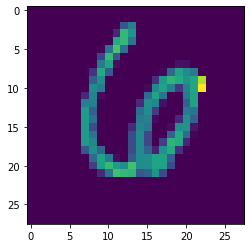

In [73]:
plt.imshow(test_x[66])
plt.show()

Importing Kaggle test data as dimensions may not be similar

In [0]:
test=pd.read_csv(r'test.csv')

In [84]:
print(test.shape)

(28000, 784)


In [0]:
test = test / 255.0

In [0]:
test = test.values.reshape(28000,28,28,1)

In [0]:
# predict = model.predict(test)
# ## Need to convert into pandas series for kaggle submission:
# # select the indix with the maximum probability
# predict = np.argmax(predict,axis = 1)

# predict = pd.Series(predict,name="Label")

In [79]:
print(type(predict))
print(predict.shape)

<class 'pandas.core.series.Series'>
(28000,)


In [0]:
# submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)

# submission.to_csv("mnist_tensorflow.csv",index=False)

Score achieved on first attempt: 0.97028
Rank: 1729

In [0]:
## Need to configure the dataset:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x=train_x.reshape(60000, 28, 28, 1)
train_x = train_x/255.0
test_x = test_x.reshape(10000, 28, 28, 1)
test_x = test_x/255.0

In [0]:
## Let's set Kaggle test Data:



In [91]:
## Let's try building a model using CNN for better accuracy.

cnn_mod = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',
                            input_shape= (28,28,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            (tf.keras.layers.Flatten()),
            (tf.keras.layers.Dense(128, activation=tf.nn.relu)),
            (tf.keras.layers.Dense(128, activation=tf.nn.relu)),
            (tf.keras.layers.Dense(10, activation=tf.nn.softmax))

])

cnn_mod.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn_mod.fit(train_x,train_y, epochs=3)
val_loss, val_acc = cnn_mod.evaluate(test_x, test_y)
print(val_loss)
print(val_acc)


Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.1401 - acc: 0.9574
Epoch 2/3
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0481 - acc: 0.9851
Epoch 3/3
10000/10000 [==============================] - 3s 331us/sample - loss: 0.0518 - acc: 0.9838
0.05177022630922147
0.9838


In [93]:
## Let's apply the model on Kaggle test data:
predict = cnn_mod.predict(test)
## Need to convert into pandas series for kaggle submission:
# select the indix with the maximum probability
predict = np.argmax(predict,axis = 1)

predict = pd.Series(predict,name="Label")
print(type(predict))
print(predict.shape)
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)

submission.to_csv("mnist_tensorflow2.csv",index=False)

<class 'pandas.core.series.Series'>
(28000,)


- The Submission Score is 0.99242

- Rank is 642.

In [0]:
### Let's convert it into a numpy array>>>



In [0]:
## Reshaping it 


In [0]:
## Now directly just fit the model:

 

5166 clearly 
needed 28000.